#Support Vector Machines

นำเข้าข้อมูล

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/Machine Learning/L5/Data_weather.csv'
df = pd.read_csv(file_path)
print(df.head())

  Formatted Date        Summary  Precip Type  Temperature (C)  \
0  4/1/2006 0:00  Partly Cloudy          1.0         9.472222   
1  4/1/2006 1:00  Partly Cloudy          1.0         9.355556   
2  4/1/2006 2:00  Mostly Cloudy          1.0         9.377778   
3  4/1/2006 3:00  Partly Cloudy          1.0         8.288889   
4  4/1/2006 4:00  Mostly Cloudy          1.0         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                     251          15.8263           0               1015.13   
1                     259          15.8263           0               1015.63   
2       

การตรวจสอบโครงสร้างข้อมูล (จำนวนฟีเจอร์, จำนวนตัวอย่าง, ชนิดข้อมูล)

In [ ]:
num_features = df.shape[1]
num_samples = df.shape[0]
data_types = df.dtypes
print(f"จำนวนฟีเจอร์ (Features): {num_features}")
print(f"จำนวนตัวอย่าง (Samples): {num_samples}")
print("\nชนิดข้อมูลของแต่ละฟีเจอร์:")
print(data_types)

จำนวนฟีเจอร์ (Features): 12
จำนวนตัวอย่าง (Samples): 96453

ชนิดข้อมูลของแต่ละฟีเจอร์:
Formatted Date               object
Summary                      object
Precip Type                 float64
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Loud Cover                    int64
Pressure (millibars)        float64
Daily Summary                object
dtype: object


In [ ]:
print("จำนวน Missing Values ในแต่ละฟีเจอร์:")
print(df.isna().sum())

จำนวน Missing Values ในแต่ละฟีเจอร์:
Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [ ]:
data= df.dropna()
print("\nข้อมูลหลังจากลบแถวที่มี Missing Values:")
print(data)


ข้อมูลหลังจากลบแถวที่มี Missing Values:
       Formatted Date        Summary  Precip Type  Temperature (C)  \
0       4/1/2006 0:00  Partly Cloudy          1.0         9.472222   
1       4/1/2006 1:00  Partly Cloudy          1.0         9.355556   
2       4/1/2006 2:00  Mostly Cloudy          1.0         9.377778   
3       4/1/2006 3:00  Partly Cloudy          1.0         8.288889   
4       4/1/2006 4:00  Mostly Cloudy          1.0         8.755556   
...               ...            ...          ...              ...   
96448  9/9/2016 19:00  Partly Cloudy          1.0        26.016667   
96449  9/9/2016 20:00  Partly Cloudy          1.0        24.583333   
96450  9/9/2016 21:00  Partly Cloudy          1.0        22.038889   
96451  9/9/2016 22:00  Partly Cloudy          1.0        21.522222   
96452  9/9/2016 23:00  Partly Cloudy          1.0        20.438889   

       Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                      7.388889      0.89            1

In [ ]:
print("จำนวน Missing Values ในแต่ละฟีเจอร์:")
print(data.isna().sum())

จำนวน Missing Values ในแต่ละฟีเจอร์:
Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


In [ ]:
duplicate_counts = data.duplicated().sum()
print(f"จำนวนข้อมูลที่ซ้ำกัน: {duplicate_counts}")

จำนวนข้อมูลที่ซ้ำกัน: 24


In [ ]:
duplicates = data[data.duplicated()]
print("\nข้อมูลที่ซ้ำกัน:")
print(duplicates)


ข้อมูลที่ซ้ำกัน:
       Formatted Date        Summary  Precip Type  Temperature (C)  \
36072   8/2/2010 0:00          Clear          1.0        18.800000   
36073   8/2/2010 1:00          Clear          1.0        18.222222   
36074   8/2/2010 2:00          Clear          1.0        18.072222   
36075   8/2/2010 3:00          Clear          1.0        16.622222   
36076   8/2/2010 4:00          Clear          1.0        16.094444   
36077   8/2/2010 5:00          Clear          1.0        15.955556   
36078   8/2/2010 6:00          Clear          1.0        17.088889   
36079   8/2/2010 7:00          Clear          1.0        20.822222   
36080   8/2/2010 8:00          Clear          1.0        23.405556   
36081   8/2/2010 9:00          Clear          1.0        26.050000   
36082  8/2/2010 10:00          Clear          1.0        27.688889   
36083  8/2/2010 11:00          Clear          1.0        28.561111   
36084  8/2/2010 12:00          Clear          1.0        28.816667   
36

In [ ]:
import numpy as np
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)  # ควอไทล์ที่ 1
    Q3 = data.quantile(0.75)  # ควอไทล์ที่ 3
    IQR = Q3 - Q1  # ช่วงระหว่างควอไทล์
    lower_bound = Q1 - 1.5 * IQR  # ค่าต่ำสุดที่ยอมรับได้
    upper_bound = Q3 + 1.5 * IQR  # ค่าสูงสุดที่ยอมรับได้
    return (data < lower_bound) | (data > upper_bound)

# ใช้ฟังก์ชันกับทุกคอลัมน์ที่เป็นตัวเลข
outliers = data.select_dtypes(include=np.number).apply(detect_outliers_iqr)

# แสดงจำนวน Outliers ในแต่ละคอลัมน์
print(outliers.sum())

Precip Type                 10712
Temperature (C)                39
Apparent Temperature (C)       22
Humidity                       46
Wind Speed (km/h)            2987
Wind Bearing (degrees)          0
Visibility (km)                 0
Loud Cover                      0
Pressure (millibars)         4423
dtype: int64


In [ ]:
from scipy.stats import zscore
# คำนวณค่า Z-score
z_scores = data.select_dtypes(include=np.number).apply(zscore)

# กำหนดค่าที่ถือว่าเป็น Outlier (เช่น >3 หรือ <-3)
outliers_z = (z_scores > 3) | (z_scores < -3)

# แสดงจำนวน Outliers ในแต่ละคอลัมน์
print(outliers_z.sum())

Precip Type                    0
Temperature (C)               39
Apparent Temperature (C)      39
Humidity                      28
Wind Speed (km/h)           1206
Wind Bearing (degrees)         0
Visibility (km)                0
Loud Cover                     0
Pressure (millibars)        1288
dtype: int64


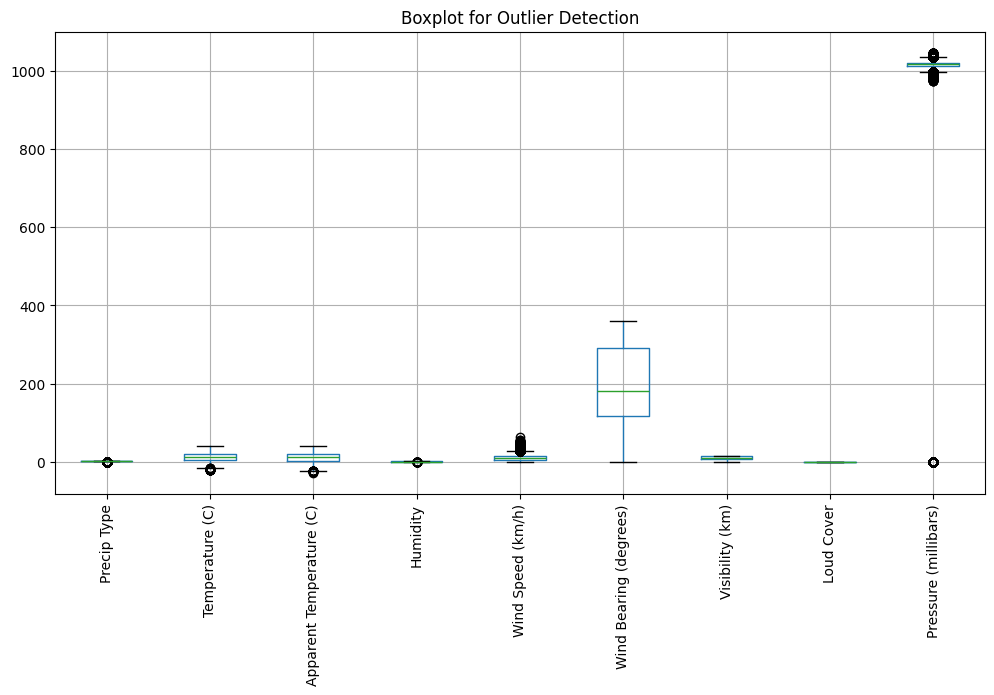

In [ ]:
import matplotlib.pyplot as plt
# วาด Boxplot สำหรับแต่ละคอลัมน์
plt.figure(figsize=(12, 6))
df_numeric = data.select_dtypes(include=np.number)
df_numeric.boxplot(rot=90)  # หมุนชื่อคอลัมน์ให้เห็นชัด
plt.title("Boxplot for Outlier Detection")
plt.show()

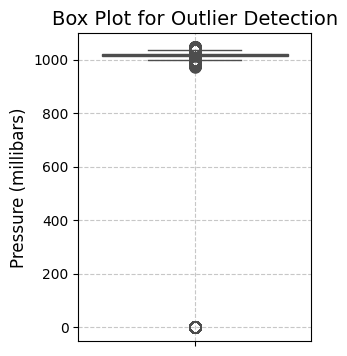

In [ ]:
import seaborn as sns
plt.figure(figsize=(3, 4))
sns.boxplot(y=data['Pressure (millibars)'], color='gray',
            flierprops=dict(marker='o', color='red', markersize=8))
plt.title("Box Plot for Outlier Detection", fontsize=14)
plt.ylabel("Pressure (millibars)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

# แสดงกราฟ
plt.show()

In [ ]:
#ตัดค่าที่เป็น 0 ของ Features Humidity และ Pressure (millibars) ออก
Data = data[(data['Pressure (millibars)'] != 0) & (data['Humidity'] != 0)]
print(Data)

       Formatted Date        Summary  Precip Type  Temperature (C)  \
0       4/1/2006 0:00  Partly Cloudy          1.0         9.472222   
1       4/1/2006 1:00  Partly Cloudy          1.0         9.355556   
2       4/1/2006 2:00  Mostly Cloudy          1.0         9.377778   
3       4/1/2006 3:00  Partly Cloudy          1.0         8.288889   
4       4/1/2006 4:00  Mostly Cloudy          1.0         8.755556   
...               ...            ...          ...              ...   
96448  9/9/2016 19:00  Partly Cloudy          1.0        26.016667   
96449  9/9/2016 20:00  Partly Cloudy          1.0        24.583333   
96450  9/9/2016 21:00  Partly Cloudy          1.0        22.038889   
96451  9/9/2016 22:00  Partly Cloudy          1.0        21.522222   
96452  9/9/2016 23:00  Partly Cloudy          1.0        20.438889   

       Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                      7.388889      0.89            14.1197   
1                      7.227778

In [ ]:
number_samples = Data.shape[0]
print(f"จำนวนตัวอย่าง (Samples): {number_samples}")

จำนวนตัวอย่าง (Samples): 94626


ตรวจสอบความสัมพันธ์แต่ละฟีเจอร์

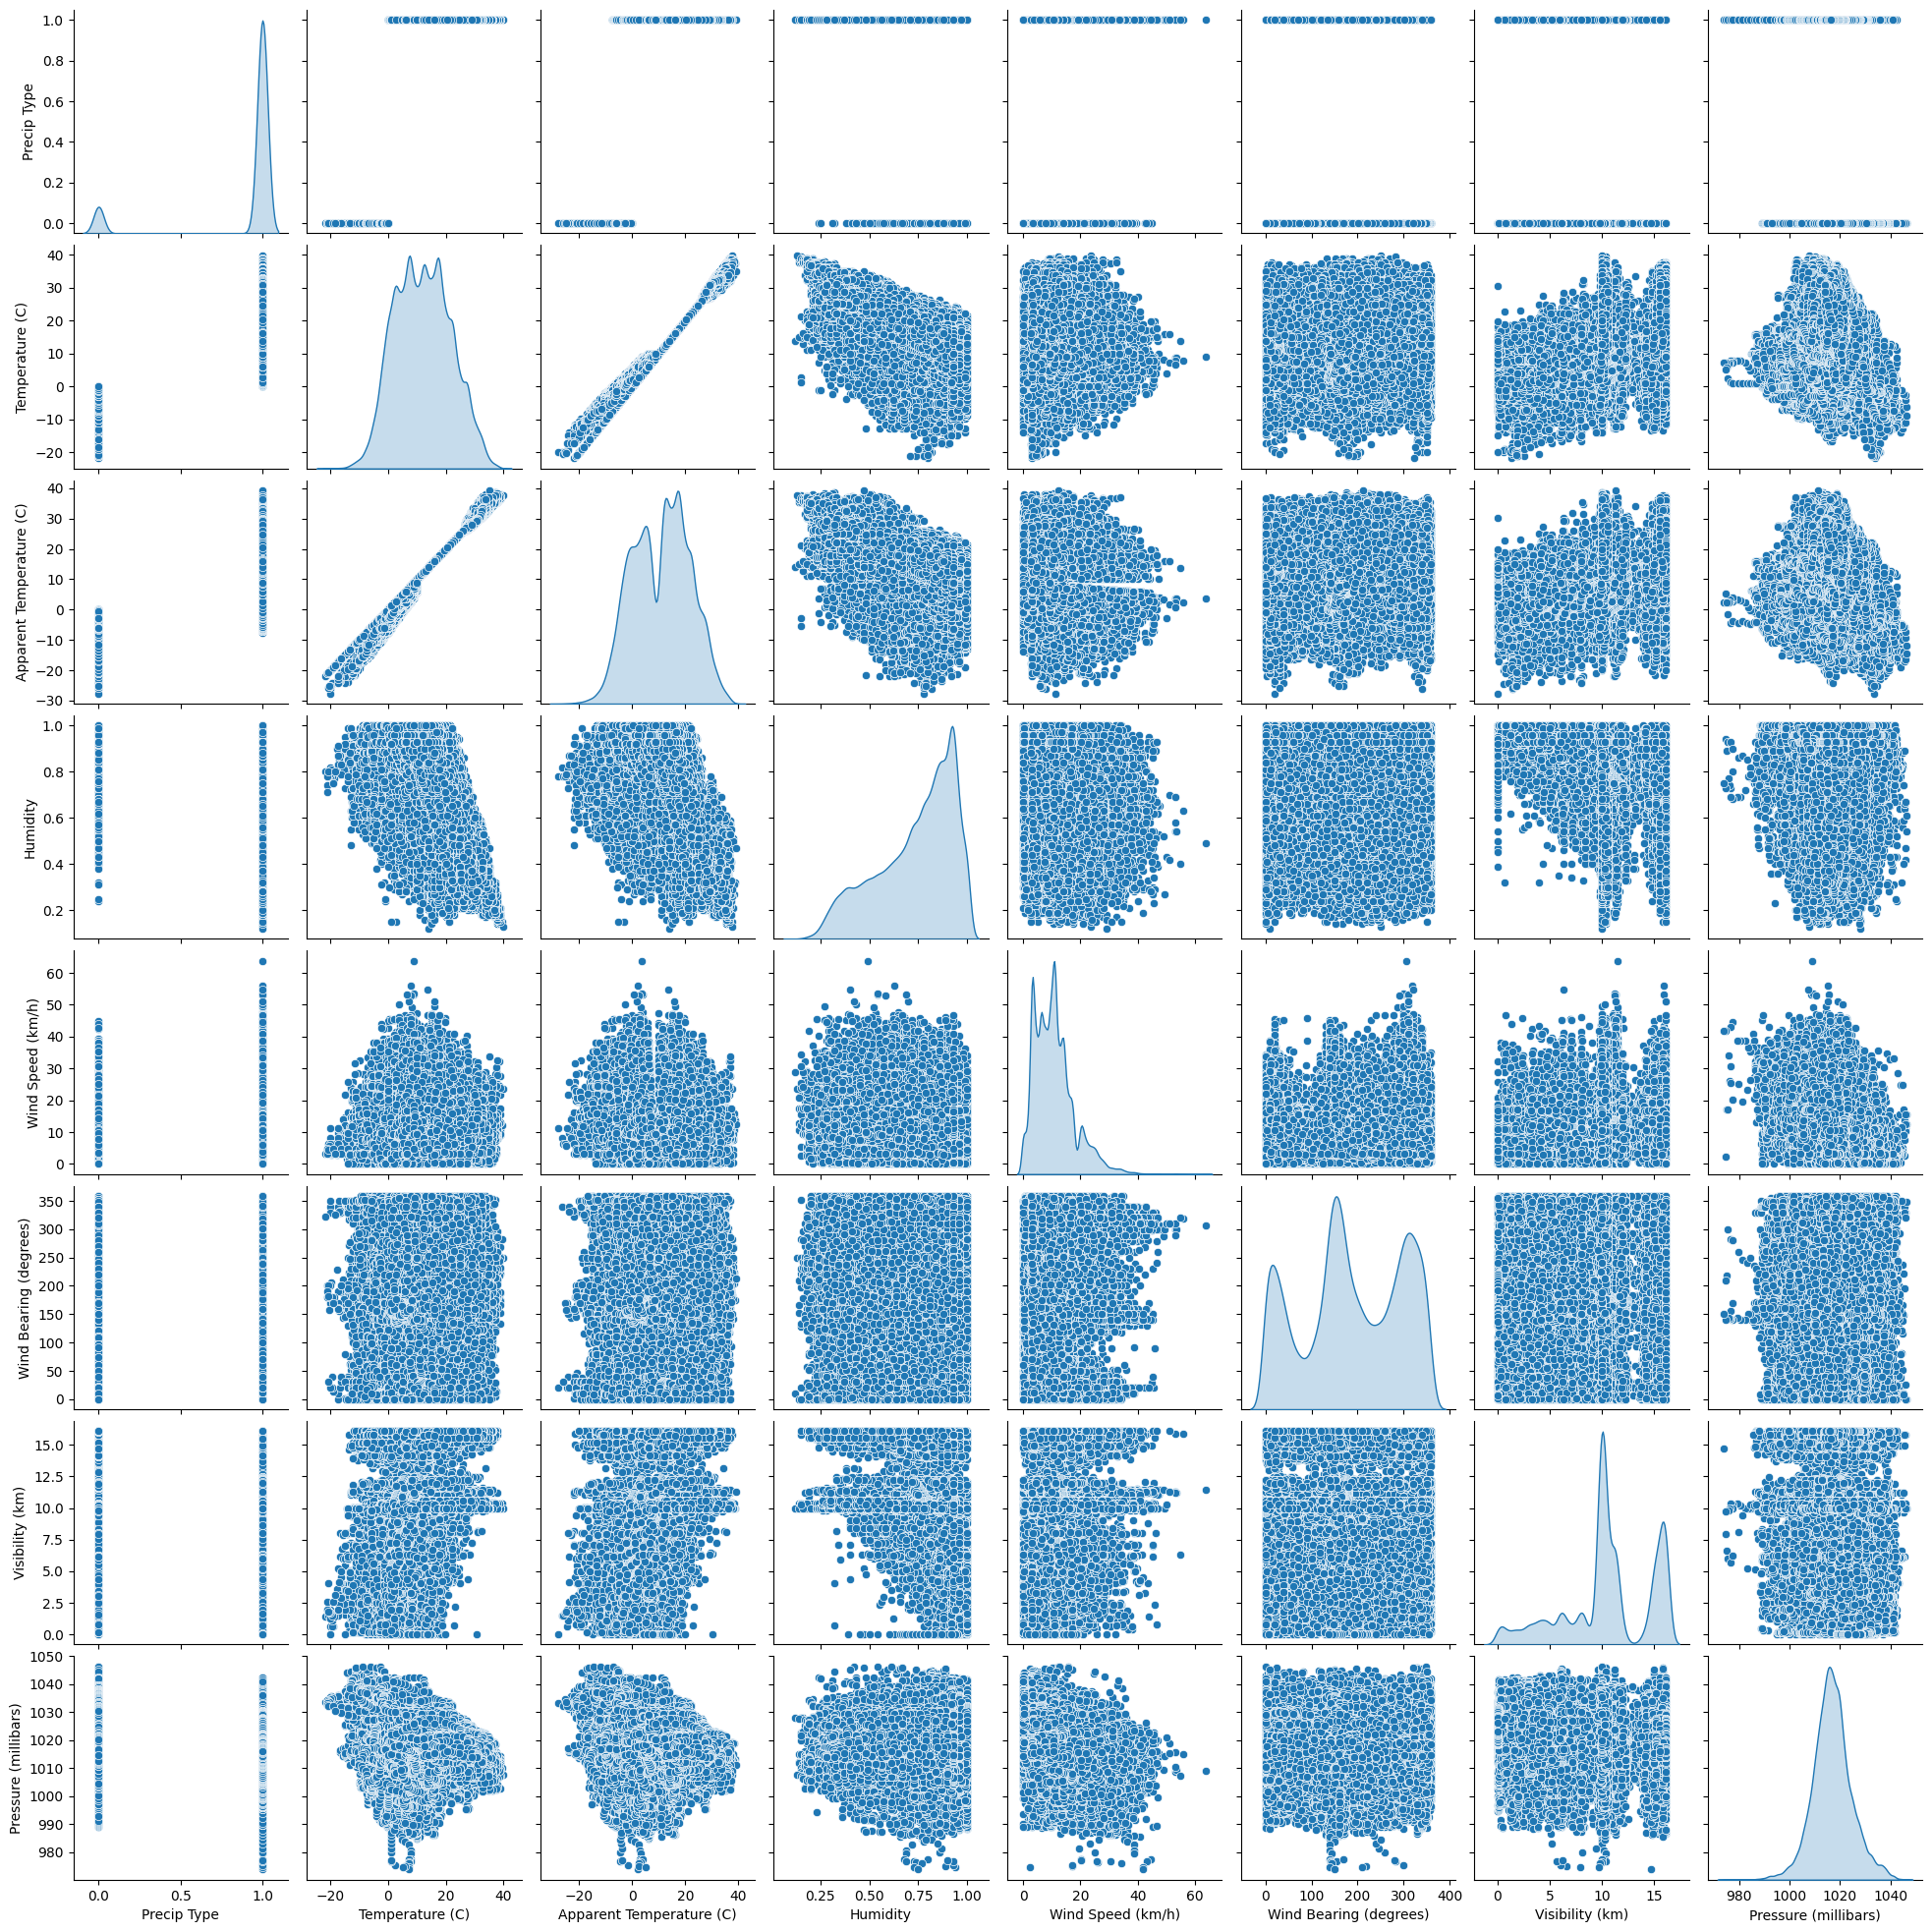

In [ ]:
sns.pairplot(Data[['Precip Type','Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
                     'Wind Speed (km/h)', 'Wind Bearing (degrees)',
                     'Visibility (km)', 'Pressure (millibars)']], diag_kind='kde')
plt.show()

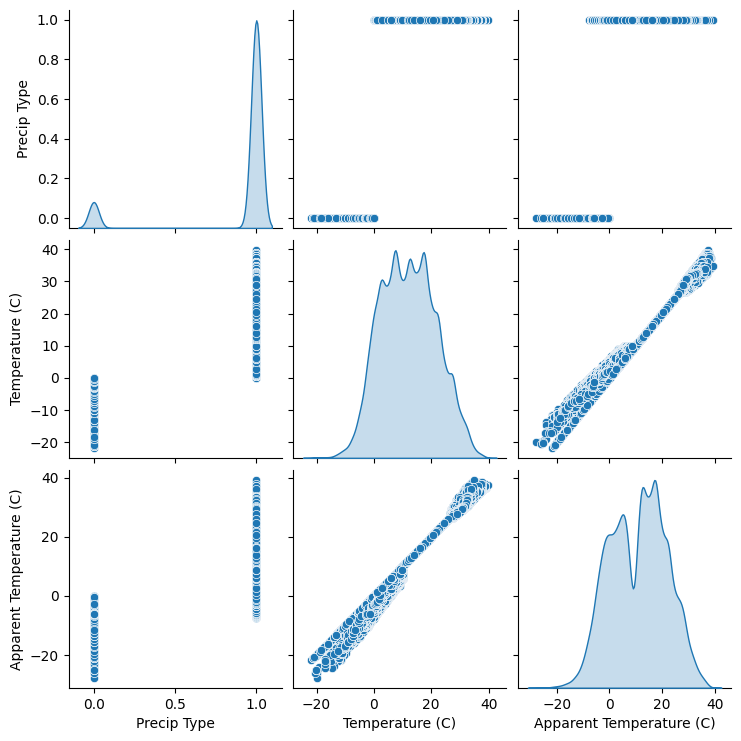

In [ ]:
sns.pairplot(Data[['Precip Type','Temperature (C)', 'Apparent Temperature (C)']], diag_kind='kde')

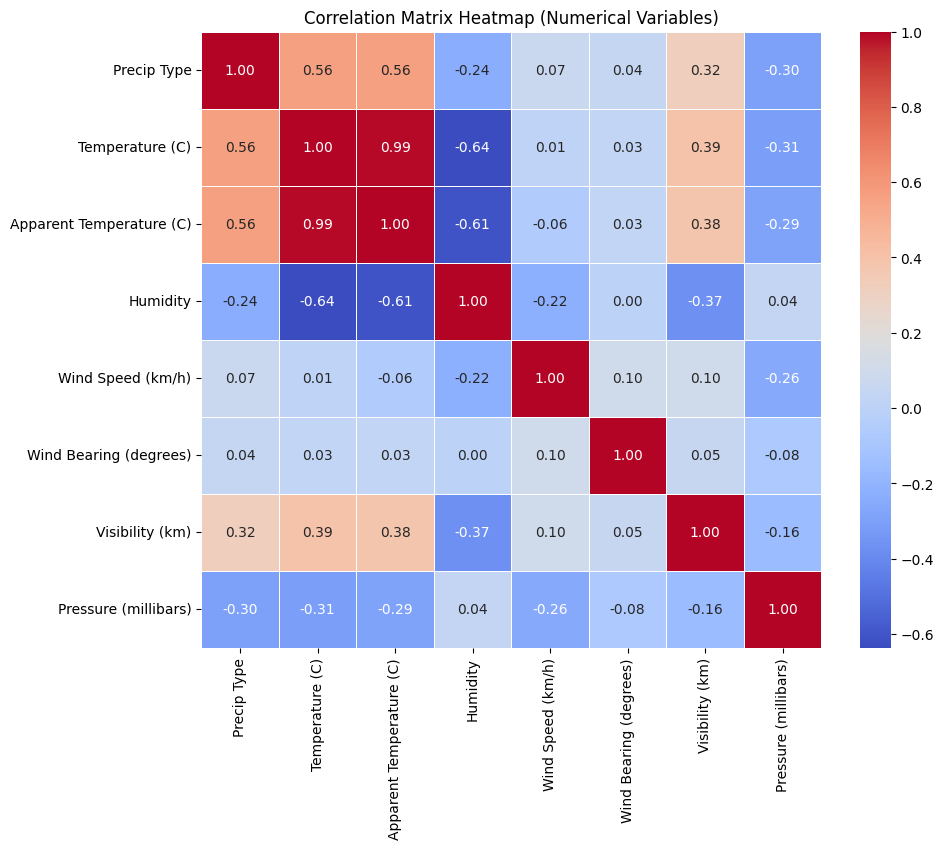

In [ ]:
import pandas as pd
columns = ['Precip Type','Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
                     'Wind Speed (km/h)', 'Wind Bearing (degrees)',
                     'Visibility (km)', 'Pressure (millibars)']

df = Data[columns]

# คำนวณค่า correlation matrix
correlation_matrix = df.corr()

# สร้าง Heatmap เพื่อแสดงความสัมพันธ์
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap (Numerical Variables)")
plt.show()

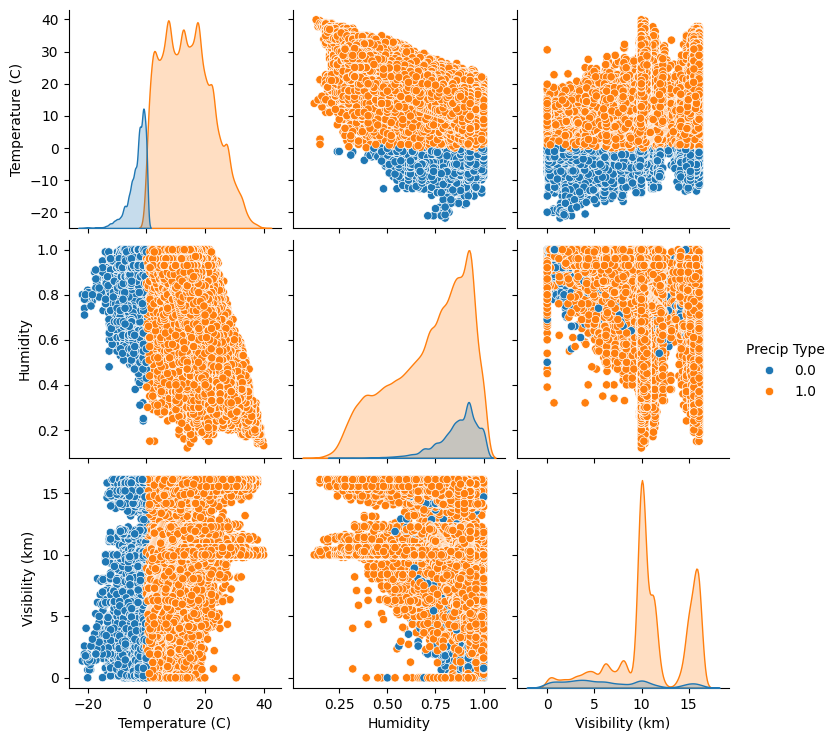

In [ ]:
columns_to_plot = ['Temperature (C)', 'Humidity', 'Visibility (km)','Precip Type']
data_subset = Data[columns_to_plot]

# สร้าง Pair Plot
sns.pairplot(data_subset, hue='Precip Type', diag_kind='kde')
plt.show()

In [ ]:
class_dt = 'Precip Type'
class_counts = Data[class_dt].value_counts()
print("จำนวนตัวอย่างในแต่ละคลาส:")
print(class_counts)

class_percentages = Data[class_dt].value_counts(normalize=True) * 100
print("\nสัดส่วนตัวอย่างในแต่ละคลาส (%):")
print(class_percentages)

จำนวนตัวอย่างในแต่ละคลาส:
Precip Type
1.0    84115
0.0    10511
Name: count, dtype: int64

สัดส่วนตัวอย่างในแต่ละคลาส (%):
Precip Type
1.0    88.892059
0.0    11.107941
Name: proportion, dtype: float64


ปรับจำนวนข้อมูลในแต่ละกลุ่มให้มีขนาดเท่ากัน

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X = Data[['Temperature (C)', 'Humidity', 'Visibility (km)']]
y = Data['Precip Type']

# ใช้ RandomUnderSampler เพื่อลดข้อมูลในคลาสที่มีจำนวนมาก
undersampler = RandomUnderSampler(random_state=42)
X_res, y_res = undersampler.fit_resample(X, y)

# แสดงข้อมูลหลังการปรับสมดุล
print(f'After Under-sampling: {Counter(y_res)}')

After Under-sampling: Counter({0.0: 10511, 1.0: 10511})


<ipython-input-26-5fa3598e5ad3>:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PCA1', y='PCA2', data=pca_df, palette="Set1")
<ipython-input-26-5fa3598e5ad3>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Species', loc='upper right')


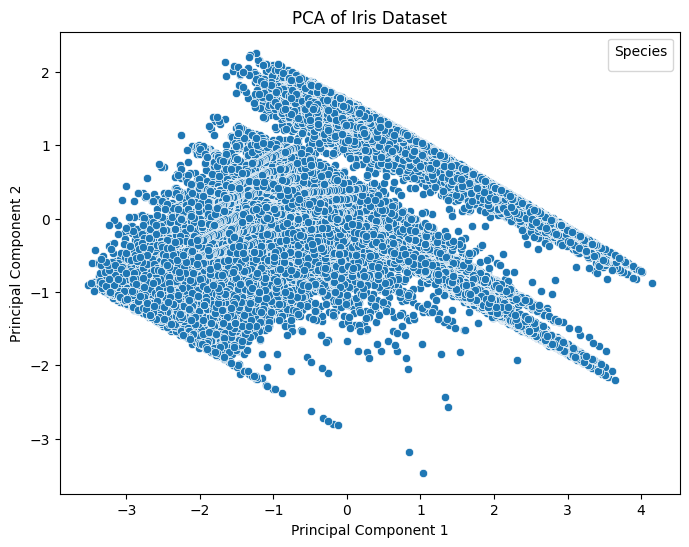

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(Data[['Temperature (C)', 'Humidity', 'Visibility (km)']])

pca = PCA(n_components=2)  # ลดมิติเป็น 2 มิติ
pca_result = pca.fit_transform(df_scaled)

# แปลงผลลัพธ์ PCA เป็น DataFrame เพื่อทำการ plot
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Plot กราฟ PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df, palette="Set1")
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species', loc='upper right')
plt.show()

 แบ่งข้อมูลเป็นชุดฝึกอบรม (Training) และชุดทดสอบ (Testing) ด้วยอัตราส่วน 70:30

In [ ]:
from sklearn.model_selection import train_test_split

# แบ่งข้อมูลเป็น Train และ Test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# ปรับสเกลข้อมูล (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#ดูจำนวนใน Train Test ว่ามีจำนวนฝนตกและจำนวนหิมะตกเท่าไหร่
print(f"Train set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

print("Class distribution in Train set:")
print(y_train.value_counts())
print("\nClass distribution in Test set:")
print(y_test.value_counts())

Train set: 14715 samples
Test set: 6307 samples
Class distribution in Train set:
Precip Type
1.0    7404
0.0    7311
Name: count, dtype: int64

Class distribution in Test set:
Precip Type
0.0    3200
1.0    3107
Name: count, dtype: int64


#การสร้างโมเดล SVM:
ทดลอง Kernel ต่าง ๆ ได้แก่:
* linear
* rbf
* poly

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# สร้างโมเดล SVM
# Linear Kernel
model = SVC(kernel= 'linear' , C=1.0)
model.fit(X_train, y_train)  # ฝึกโมเดล

# ทำนายผลลัพธ์
y_pred = model.predict(X_test)

# แสดงผลความแม่นยำ
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9927065165688918

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3200
         1.0       1.00      0.99      0.99      3107

    accuracy                           0.99      6307
   macro avg       0.99      0.99      0.99      6307
weighted avg       0.99      0.99      0.99      6307



In [ ]:
file_path = '/content/drive/MyDrive/Machine Learning/L5/65030292.xlsx'
test = pd.read_excel(file_path)
print(df.head())

        Unnamed: 0 Unnamed: 1       Unnamed: 2
0  Temperature (C)   Humidity  Visibility (km)
1         6.854305  24.039507         1.029225
2        32.782144  15.227525        48.495493
3        22.939727  87.955853        41.622132
4        16.939632  64.100351        10.616956


Unnamed: 0    object
Unnamed: 1    object
Unnamed: 2    object
dtype: object

In [ ]:
data = {
    'Temperature (C)': [6.854305, 32.782144, 22.939727, 16.939632],
    'Humidity': [24.039507, 15.227525, 87.955853, 64.100351],
    'Visibility (km)': [1.029225, 48.495493, 41.622132, 10.616956]
}

# สร้าง DataFrame
df = pd.DataFrame(data)

scaler = StandardScaler()
X_test = scaler.fit_transform(df)

predictions = model.predict(X_test)

df['Predictions'] = predictions
print(df)

   Temperature (C)   Humidity  Visibility (km)  Predictions
0         6.854305  24.039507         1.029225          0.0
1        32.782144  15.227525        48.495493          1.0
2        22.939727  87.955853        41.622132          1.0
3        16.939632  64.100351        10.616956          1.0


In [ ]:
# RBF Kernel
model_rbf = SVC(kernel= 'rbf', C=1.0, gamma='scale', probability=True)
model_rbf.fit(X_train, y_train)

# ทำนายผลลัพธ์
y_pred_rbf = model_rbf.predict(X_test)

# แสดงผลความแม่นยำ
print("Accuracy with RBF Kernel:", accuracy_score(y_test, y_pred_rbf))
print("\nClassification Report (RBF Kernel):")
print(classification_report(y_test, y_pred_rbf))

Accuracy with RBF Kernel: 0.9898525447915015

Classification Report (RBF Kernel):
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3200
         1.0       1.00      0.98      0.99      3107

    accuracy                           0.99      6307
   macro avg       0.99      0.99      0.99      6307
weighted avg       0.99      0.99      0.99      6307



In [ ]:
# Step 5: Make predictions using your model
predictions = model_rbf.predict(X_test)

# Step 6: Print predictions or add them to the DataFrame
df['Predictions'] = predictions
print(df)

   Temperature (C)   Humidity  Visibility (km)  Predictions
0         6.854305  24.039507         1.029225          0.0
1        32.782144  15.227525        48.495493          1.0
2        22.939727  87.955853        41.622132          1.0
3        16.939632  64.100351        10.616956          1.0


In [ ]:
# Polynomial Kernel
model_poly = SVC(kernel='poly', degree=3, C=1.0)
model_poly.fit(X_train, y_train)

# ทำนายผลลัพธ์
y_pred_poly = model_poly.predict(X_test)

# แสดงผลความแม่นยำ
print("Accuracy with Polynomial Kernel:", accuracy_score(y_test, y_pred_poly))
print("\nClassification Report (Polynomial Kernel):")
print(classification_report(y_test, y_pred_poly))

Accuracy with Polynomial Kernel: 0.9757412398921833

Classification Report (Polynomial Kernel):
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      3200
         1.0       0.98      0.97      0.98      3107

    accuracy                           0.98      6307
   macro avg       0.98      0.98      0.98      6307
weighted avg       0.98      0.98      0.98      6307



#การประเมินผล:

Accuracy: 0.9927065165688918
Precision: 1.0
Recall: 0.9851947215963952
F1-Score: 0.9925421530479897


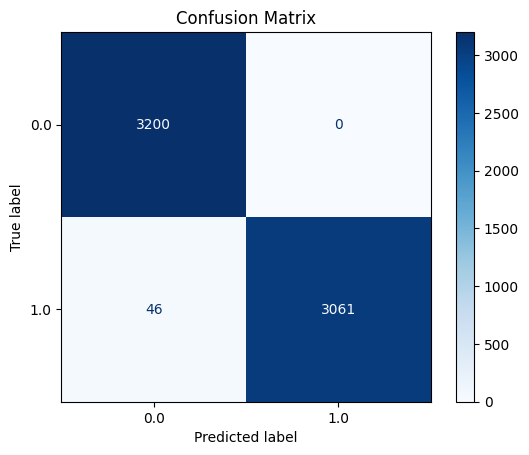

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from mlxtend.plotting import plot_decision_regions

#Linear Kernel
# คำนวณเกณฑ์การประเมินผล
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# แสดง Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

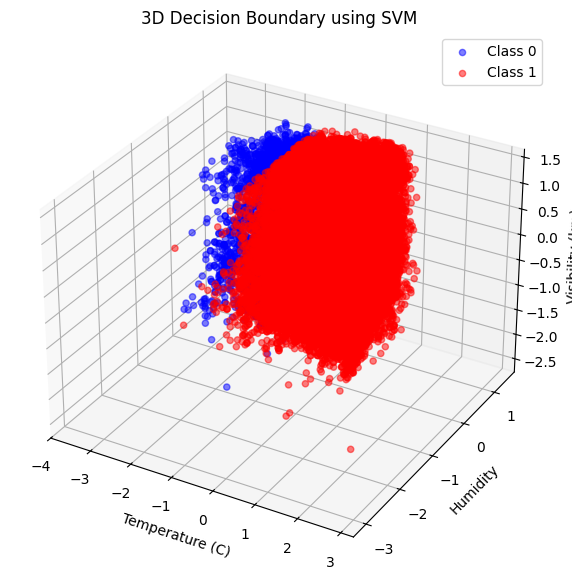

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# แสดงข้อมูลแต่ละคลาสด้วยสีต่างกัน
ax.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], X_train[y_train == 0][:, 2], c='blue', label="Class 0", alpha=0.5)
ax.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], X_train[y_train == 1][:, 2], c='red', label="Class 1", alpha=0.5)

# สร้าง Decision Boundary
xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 30),
                     np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 30))

# คำนวณค่าของ Decision Boundary
coef = model.coef_[0]
intercept = model.intercept_
zz = (-coef[0] * xx - coef[1] * yy - intercept) / coef[2]

# ปรับแต่งกราฟ
ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Humidity')
ax.set_zlabel('Visibility (km)')
ax.set_title('3D Decision Boundary using SVM')
ax.legend()
plt.show()

Accuracy: 0.9930956742285473
Precision: 0.9988029208730697
Recall: 0.9934119141167599
F1-Score: 0.9961001233634447


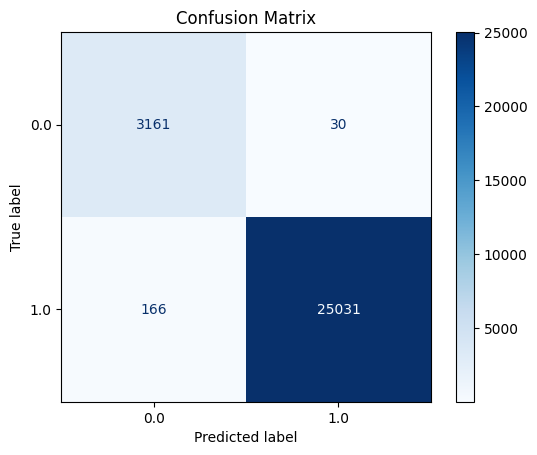

In [ ]:
# RBF Kernel
# คำนวณเกณฑ์การประเมินผล
accuracy = accuracy_score(y_test, y_pred_rbf)
precision = precision_score(y_test, y_pred_rbf)
recall = recall_score(y_test, y_pred_rbf)
f1 = f1_score(y_test, y_pred_rbf)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# แสดง Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rbf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rbf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

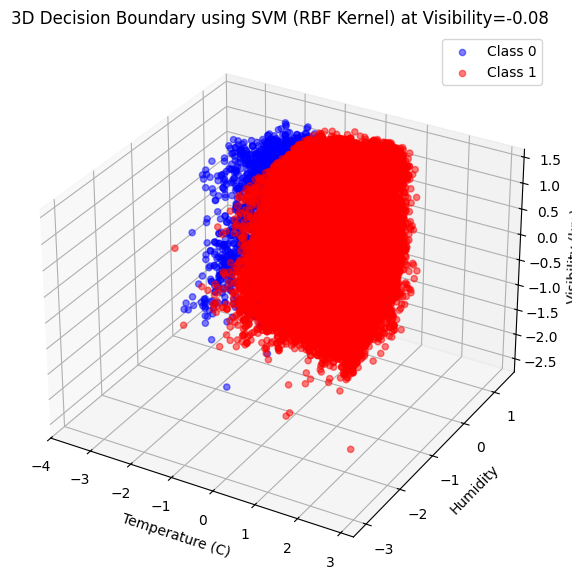

In [ ]:
fixed_z = np.median(X_train[:, 2])

# สร้าง Meshgrid สำหรับการพล็อต Decision Boundary (Feature 1 & Feature 2 เท่านั้น)
x_range = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
y_range = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100)
xx, yy = np.meshgrid(x_range, y_range)

# คำนวณค่า Decision Function บนตาราง 2D
grid = np.c_[xx.ravel(), yy.ravel(), np.full_like(xx.ravel(), fixed_z)]
decision_values = model_rbf.decision_function(grid).reshape(xx.shape)

# สร้าง 3D Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# แสดงข้อมูลแต่ละคลาสด้วยสีต่างกัน
ax.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], X_train[y_train == 0][:, 2], c='blue', label="Class 0", alpha=0.5)
ax.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], X_train[y_train == 1][:, 2], c='red', label="Class 1", alpha=0.5)

# พล็อต Contour ของ Decision Boundary บนระนาบที่ fixed_z
ax.contour(xx, yy, np.full_like(xx, fixed_z), decision_values, levels=[0], colors='black', linewidths=2)

# ปรับแต่งกราฟ
ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Humidity')
ax.set_zlabel('Visibility (km)')
ax.set_title(f'3D Decision Boundary using SVM (RBF Kernel) at Visibility={fixed_z:.2f}')
ax.legend()
plt.show()

Accuracy: 0.9935536142031844
Precision: 0.999161877394636
Recall: 0.9935706631741874
F1-Score: 0.9963584263626052


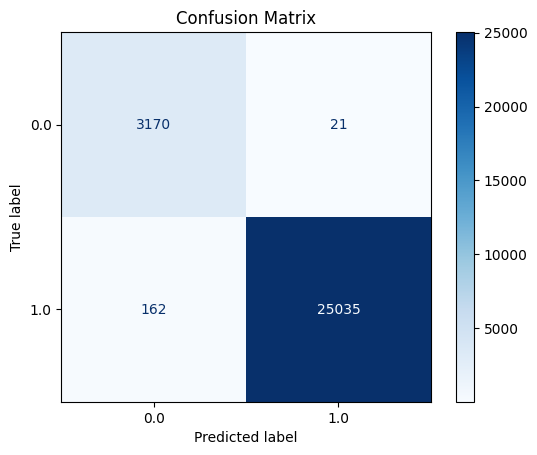

In [ ]:
# Polynomial Kernel
# คำนวณเกณฑ์การประเมินผล
accuracy = accuracy_score(y_test, y_pred_poly)
precision = precision_score(y_test, y_pred_poly)
recall = recall_score(y_test, y_pred_poly)
f1 = f1_score(y_test, y_pred_poly)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# แสดง Confusion Matrix
cm = confusion_matrix(y_test, y_pred_poly)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_poly.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


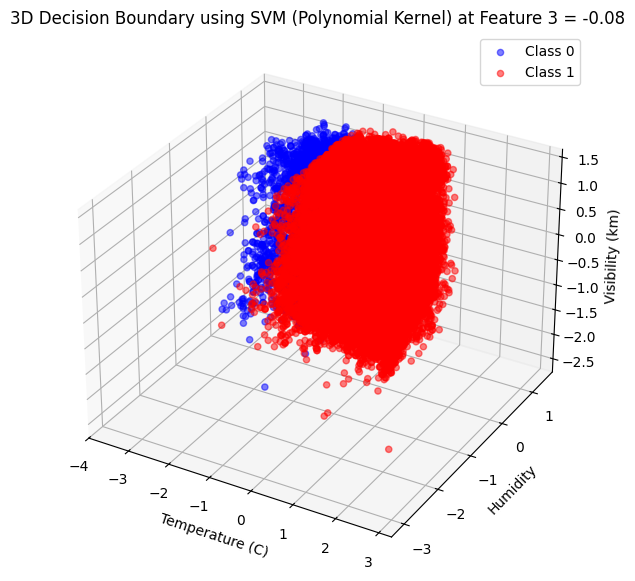

In [ ]:
fixed_z = np.median(X_train[:, 2])

# สร้าง Meshgrid สำหรับการพล็อต Decision Boundary (Feature 1 & Feature 2 เท่านั้น)
x_range = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
y_range = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100)
xx, yy = np.meshgrid(x_range, y_range)

# คำนวณค่า Decision Function บนตาราง 2D
grid = np.c_[xx.ravel(), yy.ravel(), np.full_like(xx.ravel(), fixed_z)]
decision_values = model_poly.decision_function(grid).reshape(xx.shape)

# สร้าง 3D Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# แสดงข้อมูลแต่ละคลาสด้วยสีต่างกัน
ax.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], X_train[y_train == 0][:, 2], c='blue', label="Class 0", alpha=0.5)
ax.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], X_train[y_train == 1][:, 2], c='red', label="Class 1", alpha=0.5)

# พล็อต Contour ของ Decision Boundary บนระนาบที่ fixed_z
ax.contour(xx, yy, np.full_like(xx, fixed_z), decision_values, levels=[0], colors='black', linewidths=2)

# ปรับแต่งกราฟ
ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Humidity')
ax.set_zlabel('Visibility (km)')
ax.set_title(f'3D Decision Boundary using SVM (Polynomial Kernel) at Feature 3 = {fixed_z:.2f}')
ax.legend()
plt.show()

In [ ]:
#Linear Kernel
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(y_train, model.predict(X_train))
test_error = mean_squared_error(y_test, model.predict(X_test))

print(f"Train MSE: {train_error:.4f}")
print(f"Test MSE: {test_error:.4f}")

Train MSE: 0.0066
Test MSE: 0.0069


In [ ]:
print(f"Train R²: {model.score(X_train, y_train):.4f}")
print(f"Test R²: {model.score(X_test, y_test):.4f}")

Train R²: 0.9934
Test R²: 0.9931


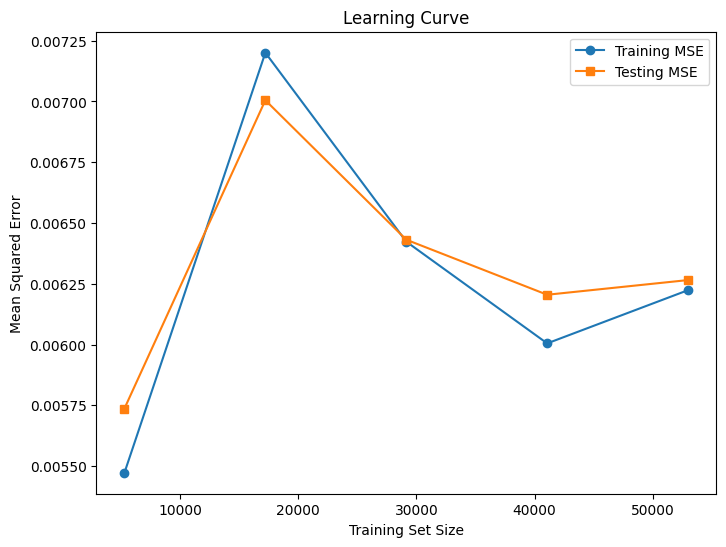

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label='Training MSE', marker='o')
plt.plot(train_sizes, test_mean, label='Testing MSE', marker='s')

plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [ ]:
# RBF Kernel
train_error_rbf = mean_squared_error(y_train, model_rbf.predict(X_train))
test_error_rbf = mean_squared_error(y_test, model_rbf.predict(X_test))

print(f"Train MSE: {train_error_rbf:.4f}")
print(f"Test MSE: {test_error_rbf:.4f}")

Train MSE: 0.0069
Test MSE: 0.0069


In [ ]:
print(f"Train R²: {model_rbf.score(X_train, y_train):.4f}")
print(f"Test R²: {model_rbf.score(X_test, y_test):.4f}")

Train R²: 0.9931
Test R²: 0.9931


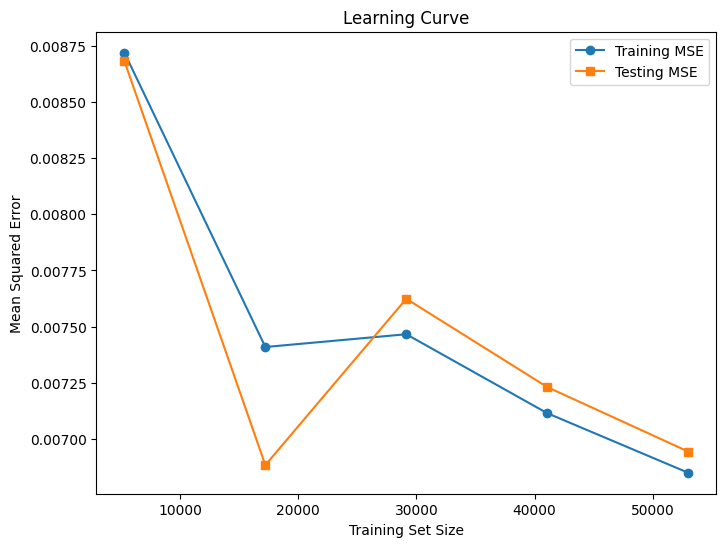

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(model_rbf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label='Training MSE', marker='o')
plt.plot(train_sizes, test_mean, label='Testing MSE', marker='s')

plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [ ]:
# Polynomial Kernel
train_error_poly = mean_squared_error(y_train, model_poly.predict(X_train))
test_error_poly = mean_squared_error(y_test, model_poly.predict(X_test))

print(f"Train MSE: {train_error_poly:.4f}")
print(f"Test MSE: {test_error_poly:.4f}")

Train MSE: 0.0064
Test MSE: 0.0064


In [ ]:
print(f"Train R²: {model_poly.score(X_train, y_train):.4f}")
print(f"Test R²: {model_poly.score(X_test, y_test):.4f}")

Train R²: 0.9936
Test R²: 0.9936


In [ ]:
train_sizes, train_scores, test_scores = learning_curve(model_poly, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label='Training MSE', marker='o')
plt.plot(train_sizes, test_mean, label='Testing MSE', marker='s')

plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()

NameError: name 'learning_curve' is not defined

#สรุปผล:


Kernel linear rbf และ poly ได้ผลดีทั้ง 3 kernel  โดยโมเดลสามารถทำนายผลลัพธ์ถูกต้อง 99% จากข้อมูลทดสอบทั้งหมด 6307 ตัว และเมื่อทำการเปลี่ยนค่าพารามิเตอร์ของ kernel poly จาก 2 เป็น 3 พบว่าผลลัพธ์ดีขึ้น

